## Name of the Project :Number Of Bank Customers Prediction

### Business Problem :

The Banks would like to know how many  number of customers wolud open the account with the bank in the future so that they can make the plans accordingly to improve their business.


### Description of the dataset:

Dataset has information about how many number of customers opened an account with the bank from 2008 to 2019.

<b>File Format :</b>csv
    
<b>Rows :</b>144
    
<b>Columns :</b>2


### Attribute Information :

<b>Month :</b> The month of the year when the customers opened the accounts in the bank

<b>Customers :</b>The number of customers opened an account in the bank in that month.

### Objective :
To build a model which predicts the number of customers who will open the account with the bank in future.

### Type of Machine Learning Problem :

Time Series

### Let us start the model development!!

#### Importing necessary libraries :

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10, 6
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Reading the data from csv :

In [2]:
data=pd.read_csv(r"D:\Projects\Number_Of_Customers_Prediction\Customers.csv")

In [3]:
# Shape of the data

data.shape

(144, 2)

In [4]:
# First 5 records of the dataframe

data.head()

,Month,Customers
0,2008-01,112
1,2008-02,118
2,2008-03,132
3,2008-04,129
4,2008-05,121


### Checking for NaN values :

In [5]:
data.isnull().sum()

Month        0
Customers    0
dtype: int64

#### Observations :

There are no NaN values.

### Checking the data types :

In [6]:
data.dtypes

Month        object
Customers     int64
dtype: object

#### Observations :

The date column is Object.But,it should be datetime.We will convert it to datetime.

### Convert type of column 'Month' from 'object' to 'datetime'

In [7]:
data['Month']=pd.to_datetime(data['Month'])
data.dtypes

Month        datetime64[ns]
Customers             int64
dtype: object

#### Observations :

Now,the Month column is in correct format.

In [8]:
data.head()

,Month,Customers
0,2008-01-01,112
1,2008-02-01,118
2,2008-03-01,132
3,2008-04-01,129
4,2008-05-01,121


### Describing the dataset :

In [9]:
data.describe()

,Customers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### Convert column 'Month' as index :

In [10]:
indexedData = data.set_index('Month')
indexedData.head()

,Customers
Month,
2008-01-01,112
2008-02-01,118
2008-03-01,132
2008-04-01,129
2008-05-01,121


### Plot indexed data (Date vs Number of Customers) :

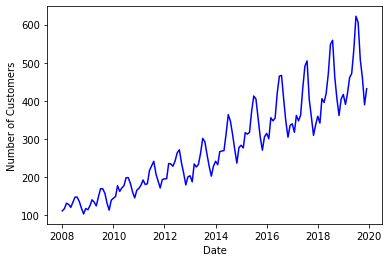

In [11]:
plt.plot(indexedData, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.show()

<b>What is stationarity?</b>

A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time.

The basic assumption before applying stochastic models is that the time series should be stationary.

As we see above plot, the data is not stationary. The trend is increasing. The mean is not constant.

So, our first goal is to make the time series into stationary.

Next step is to find seasonality (s).

Let's plot Moving average for 4, 6, 8 and 12 months.

### 4- Months Moving Average :

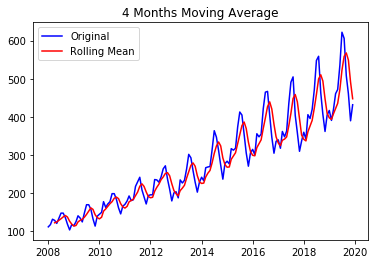

In [12]:
four_months_moving_average = indexedData.rolling(window=4).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')
plt.show()

### 6-Months Moving Average :

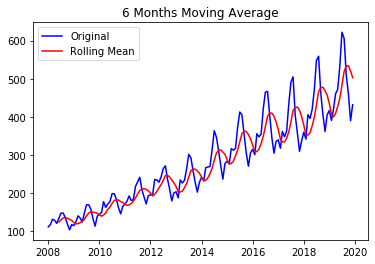

In [13]:
six_months_moving_average = indexedData.rolling(window=6).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')
plt.show()

### 8-Months Moving Average :

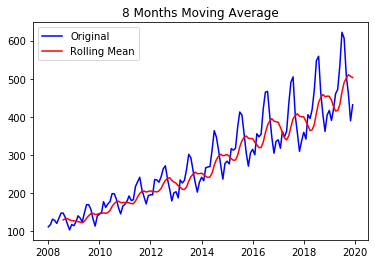

In [14]:
eight_months_moving_average = indexedData.rolling(window=8).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')
plt.show()

### 12-Months Moving Average :

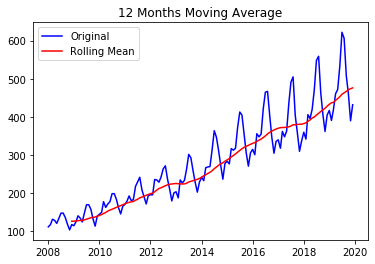

In [15]:
twelve_months_moving_average = indexedData.rolling(window=12).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')
plt.show()

#### Observations :

As we observe the above four moving averages, the moving average with window '12' is smooth compared to others. So, we can confirm that the seasonality(s) is 12.

### Checking the Stationairity of a Series :



<b>There are two tests to check whether a time series is stationary or not.</b>

Rolling statistics (Visual test)

Dickey Fuller test

### Rolling statistics - A visual test :

From the above observations, we can chose 's' as 12. (s=12)

In [16]:
rolmean = indexedData.rolling(window=12).mean()

In [17]:
rolmean.head(15)

,Customers
Month,
2008-01-01,NaN
2008-02-01,NaN
2008-03-01,NaN
2008-04-01,NaN
2008-05-01,NaN
2008-06-01,NaN
2008-07-01,NaN
2008-08-01,NaN
2008-09-01,NaN


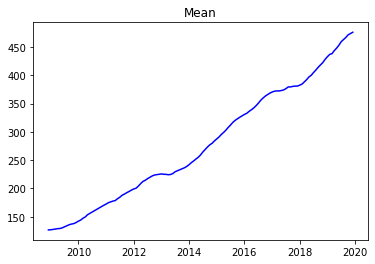

In [18]:
plt.plot(rolmean, 'blue')
plt.title('Mean')
plt.show()

In [19]:
rolstd = indexedData.rolling(window=12).std()

In [20]:
rolstd.head(15)

,Customers
Month,
2008-01-01,NaN
2008-02-01,NaN
2008-03-01,NaN
2008-04-01,NaN
2008-05-01,NaN
2008-06-01,NaN
2008-07-01,NaN
2008-08-01,NaN
2008-09-01,NaN


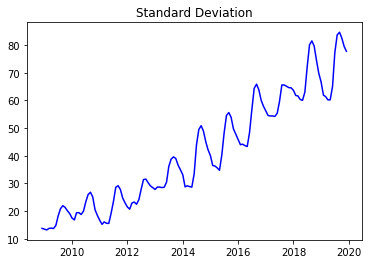

In [21]:
plt.plot(rolstd, 'blue')
plt.title('Standard Deviation')
plt.show()

Note : As the data is at monthly level (12), we used window as 12. So, we get 'NaN' for the first 11 months.

### Plot rolling statistics :

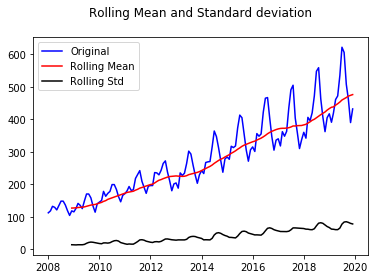

In [22]:
plt.plot(indexedData, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation\n')
plt.show()

#### Observations :

As we can see, mean and standard deviation are not stationary. So, the time seires is not stationary.

### Dickey Fuller test : 

Null Hypothesis : Time Series is not Stationary.

In [23]:
dftest = adfuller(indexedData['Customers'], autolag='AIC')

In [24]:
dftest

(0.8153688792060456,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [25]:
dftest[4]

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [26]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

In [27]:
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

#### Observations :

p-value is high(p>0.05). It should be very less(p<0.05). We fail to reject the null hypothesis as p-value is high. So, the time series is non-stationary.

If p-value is less, then we can say that the time series is stationary.

### Function to perform both the tests :

Let's write a function to perform both the tests for us at a time.

In [28]:
def test_stationary(timeseries):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries['Customers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

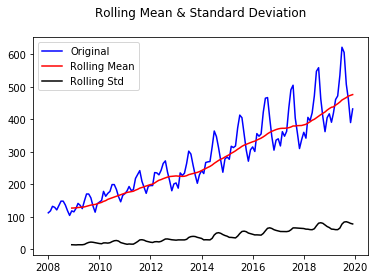

Results of Dickey Fuller Test:

Test Statistic                   0.815369
p-value                          0.991880
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [29]:
# Calling the function 
test_stationary(indexedData)

#### Estimating trend :

Apply log transform on the indexed_data.

#### Log Transformation :

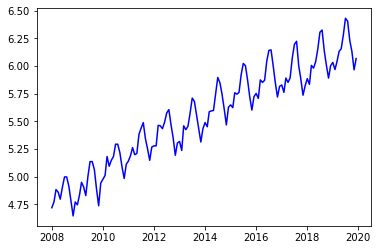

In [30]:
indexedData_logScale= np.log(indexedData)
plt.plot(indexedData_logScale, 'blue')
plt.show()

#### Observations :
Trend remains same. The values of the y-axis got changed.

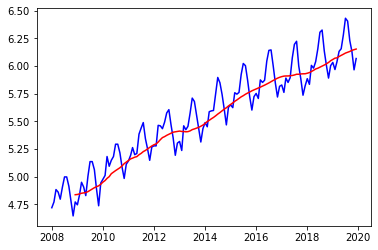

In [31]:
movingAverage = indexedData_logScale.rolling(window=12).mean()
movingSTD = indexedData_logScale.rolling(window=12).std()
plt.plot(indexedData_logScale, color='blue')
plt.plot(movingAverage, color='red')
plt.show()

#### Checking the stationarity on log data :

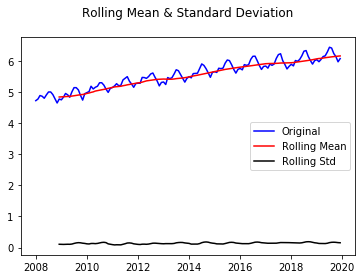

Results of Dickey Fuller Test:

Test Statistic                  -1.717017
p-value                          0.422367
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [32]:
test_stationary(indexedData_logScale)

#### Observations :

The time series is not stationary. We can tell just by seeing the above graph. The mean is not constant.

#### Another feature engineering :

In [33]:
dataLogScaleMinusMovingAverage = indexedData_logScale - movingAverage
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head()

,Customers
Month,
2008-12-01,-0.065494
2009-01-01,-0.093449
2009-02-01,-0.007566
2009-03-01,0.099416
2009-04-01,0.052142


#### Checking the stationarity on the new feature :

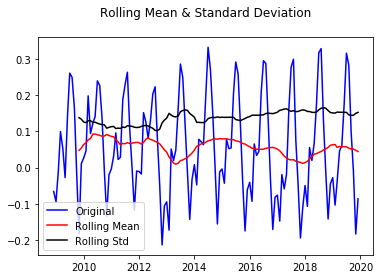

Results of Dickey Fuller Test:

Test Statistic                  -3.162908
p-value                          0.022235
No. of Lags used                13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [34]:
test_stationary(dataLogScaleMinusMovingAverage)

#### Observations :

As p-value is less than 0.05, null hypothesis is rejected. So, it is stationary.

#### Another feature engineering technique :

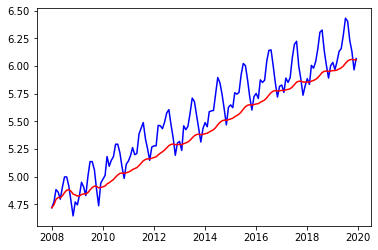

In [35]:
exponentialDecayWeightedAverage = indexedData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedData_logScale, 'blue')
plt.plot(exponentialDecayWeightedAverage, 'red')
plt.show()

#### Checking for Stationarity :


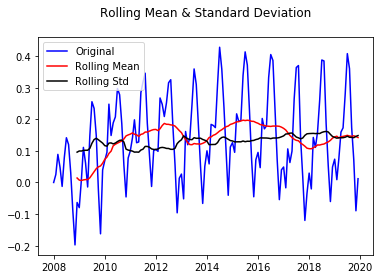

Results of Dickey Fuller Test:

Test Statistic                  -3.601262
p-value                          0.005737
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [36]:
dataLogScaleMinusMovingExponentialDecayAverage = indexedData_logScale - exponentialDecayWeightedAverage
test_stationary(dataLogScaleMinusMovingExponentialDecayAverage)

#### Observations :
As p-value is less than 0.05 null hypothesis is rejected. So, it is stationary.

### Another way of making the time series stationary :differencing

Let's difference the log transformed data.

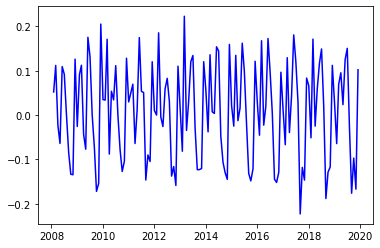

In [37]:
dataLogDiffShifting = indexedData_logScale - indexedData_logScale.shift(1)
plt.plot(dataLogDiffShifting, color='blue')
plt.show()

In [38]:
dataLogDiffShifting.head()

,Customers
Month,
2008-01-01,NaN
2008-02-01,0.052186
2008-03-01,0.112117
2008-04-01,-0.022990
2008-05-01,-0.064022


#### Dropping NaN values :

In [39]:
dataLogDiffShifting.dropna(inplace=True)
dataLogDiffShifting.head()

,Customers
Month,
2008-02-01,0.052186
2008-03-01,0.112117
2008-04-01,-0.022990
2008-05-01,-0.064022
2008-06-01,0.109484


#### Checking for Stationarity :



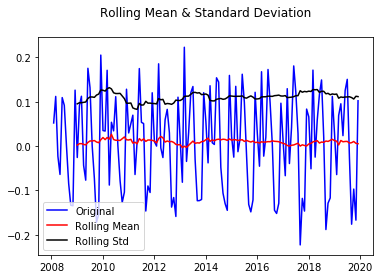

Results of Dickey Fuller Test:

Test Statistic                  -2.717131
p-value                          0.071121
No. of Lags used                14.000000
Number of observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [40]:
test_stationary(dataLogDiffShifting)

#### Observations :

Null hypothesis is rejected. Therefore, the time series is stationary now after differencing once.

### Components of time series :

In [41]:
decomposition = seasonal_decompose(indexedData_logScale)

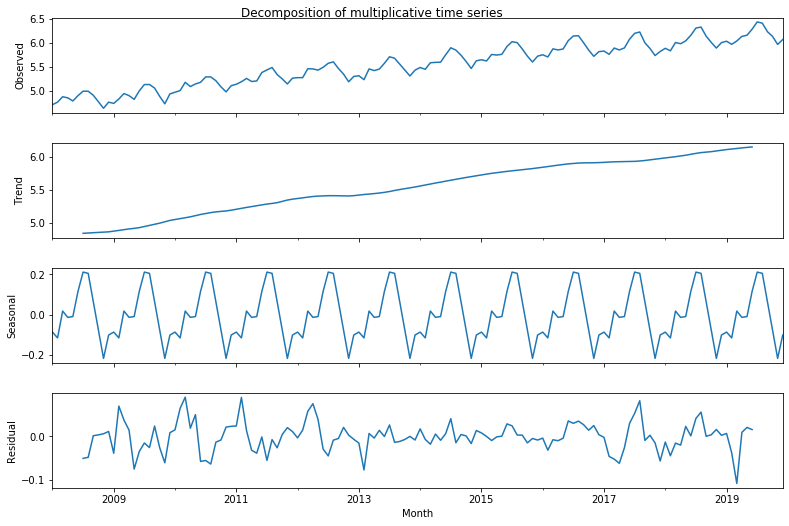

In [43]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.suptitle('Decomposition of multiplicative time series')
plt.show()

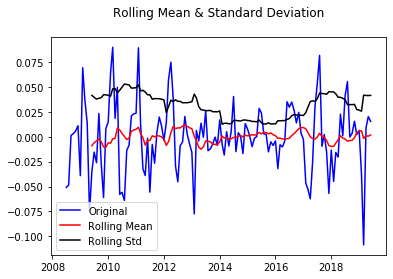

Results of Dickey Fuller Test:

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
No. of Lags used               9.000000e+00
Number of observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [44]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

#### Observations :

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this time series is very close to stationary.

<b>ACF and PACF plots</b>

While fitting an arima model, we need to find correct 'p', 'd' and 'q'.

We find 'd' by differencing the data number of times till it becomes stationary.

ACF and PACF plots are very useful in determining the values of p and q.

### ACF and PACF Plots :

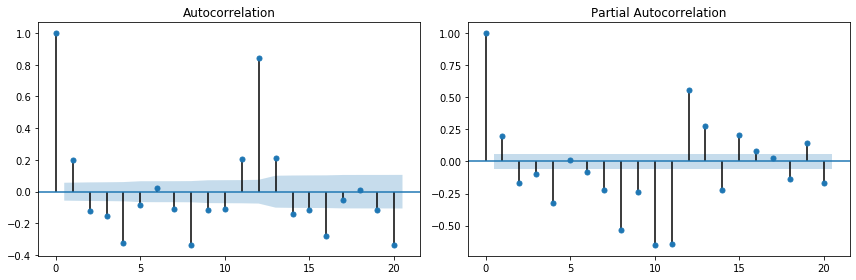

In [45]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(dataLogDiffShifting, lags=20, ax=axes[0], alpha=0.5)
plot_pacf(dataLogDiffShifting, lags=20, ax=axes[1], alpha=0.5)
plt.tight_layout()

#### Observations :

The lag value where the PACF graph crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

The lag value where the ACF graph crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

### Building ARIMA model with best p,d,q 

Plotting ARIMA model


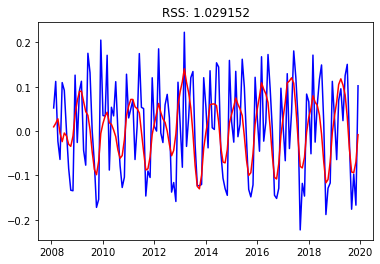

In [46]:
model = ARIMA(indexedData_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataLogDiffShifting, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues - dataLogDiffShifting['Customers'])**2))
print('Plotting ARIMA model')

### AR model :

Plotting AR model


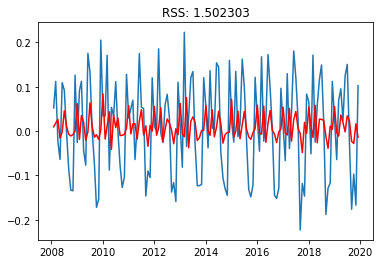

In [47]:
model = ARIMA(indexedData_logScale, order=(2,1,0))
results_AR = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_AR.fittedvalues - dataLogDiffShifting['Customers'])**2))
print('Plotting AR model')

### MA Model :

Plotting MA model


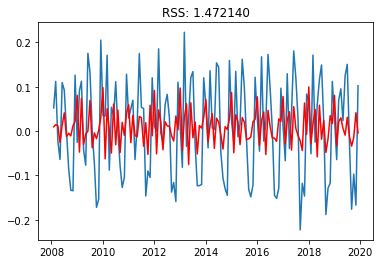

In [48]:
model = ARIMA(indexedData_logScale, order=(0,1,2))
results_MA = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_MA.fittedvalues - dataLogDiffShifting['Customers'])**2))
print('Plotting MA model')

In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
2008-02-01    0.009580
2008-03-01    0.017491
2008-04-01    0.027670
2008-05-01   -0.004521
2008-06-01   -0.023890
dtype: float64

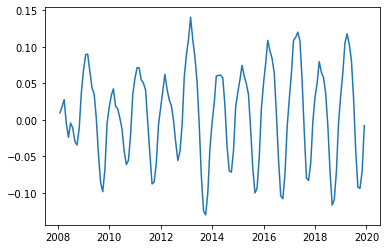

In [50]:
plt.plot(predictions_ARIMA_diff)
plt.show()

#### Observations :
As we compare the above models, the model with parameters (2,1,2) has less RSS score.

### Converting to original scale :

The way to convert the differencing to log scale is to add these differences consecutively to the base number.

In [51]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
2008-02-01    0.009580
2008-03-01    0.027071
2008-04-01    0.054742
2008-05-01    0.050221
2008-06-01    0.026331
dtype: float64

In [52]:
indexedData_logScale['Customers']

Month
2008-01-01    4.718499
2008-02-01    4.770685
2008-03-01    4.882802
2008-04-01    4.859812
2008-05-01    4.795791
2008-06-01    4.905275
2008-07-01    4.997212
2008-08-01    4.997212
2008-09-01    4.912655
2008-10-01    4.779123
2008-11-01    4.644391
2008-12-01    4.770685
2009-01-01    4.744932
2009-02-01    4.836282
2009-03-01    4.948760
2009-04-01    4.905275
2009-05-01    4.828314
2009-06-01    5.003946
2009-07-01    5.135798
2009-08-01    5.135798
2009-09-01    5.062595
2009-10-01    4.890349
2009-11-01    4.736198
2009-12-01    4.941642
2010-01-01    4.976734
2010-02-01    5.010635
2010-03-01    5.181784
2010-04-01    5.093750
2010-05-01    5.147494
2010-06-01    5.181784
                ...   
2017-07-01    6.196444
2017-08-01    6.224558
2017-09-01    6.001415
2017-10-01    5.883322
2017-11-01    5.736572
2017-12-01    5.820083
2018-01-01    5.886104
2018-02-01    5.834811
2018-03-01    6.006353
2018-04-01    5.981414
2018-05-01    6.040255
2018-06-01    6.156979
2018-

In [53]:
indexedData_logScale['Customers'].ix[0]

4.718498871295094

In [54]:
indexedData_logScale.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [55]:
predictions_ARIMA_log = pd.Series(indexedData_logScale['Customers'].ix[0], index=indexedData_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
2008-01-01    4.718499
2008-02-01    4.728079
2008-03-01    4.745570
2008-04-01    4.773241
2008-05-01    4.768720
dtype: float64

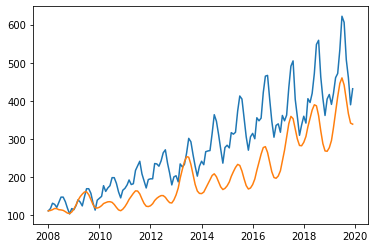

In [56]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedData)
plt.plot(predictions_ARIMA)
plt.show()

### Conclusions :

As we see, the model is not too bad. It's okay. We can try with different parameters and different transformations to build a better model.